# 📊 Dağılımlar: Verinin Şeklini Tanıyan Ayna

## Giriş: 

Diyelim ki bir ürünün 1000 satışı var.  
Her satış fiyatı farklı.  
Peki bu fiyatlar nasıl dağılmış?

👉 Bu soruya yanıt verecek olan şey: **dağılımdır.**

## 🔍 Rassal Değişken Nedir?

Bir deney sonucu alabilecekleri değerlerdir.

📌 Örnek:
- Yazı-tura atışı → `X = {0, 1}`
- Satış adedi → `X = {1, 2, 3, ...}`

✅ Rassal değişkenler iki türe ayrılır:
- **Kesikli:** Sayılabilir sonuçlar
- **Sürekli:** Ölçülebilir, sonsuz olası değer

> **Büyük Sayılar Yasası**</span>
**Bir rassal değişkenin uzun vadeli kararlığını tanımlayan olasılık teoremidir.
Kanun kabaca bildiğimiz günlük bir gerçeğin matematiksel ispatıdır.Büyük Sayılar Yasası, bir deneyin pratikte gözlenen başarı oranının, deneme sayısı arttıkça teoride beklenen istatistiki sonuca giderek yaklaşma eğiliminde olduğunu belirten bir yasadır. Bunun sebebi, örneklem büyüklüğü ne kadar fazlaysa, bu örneklemin genel popülasyonun niteliklerini yansıtma ihtimalinin o kadar yüksek olmasıdır.**

In [50]:
# Daha fazla veri toplarsan → ortalama gerçek değere yaklaşır.

for n in [10, 100, 1000, 10000]:
    sample = np.random.normal(loc=100, scale=15, size=n)
    print(f"{n} örneklem ortalaması: {np.mean(sample):.2f}")

10 örneklem ortalaması: 98.72
100 örneklem ortalaması: 99.87
1000 örneklem ortalaması: 99.35
10000 örneklem ortalaması: 100.24


📌 Deney sayısı arttıkça ortalama gerçek değere yaklaşıyor.

In [49]:
#Bu örnekte  bir demir para için yazı veya tura gelme olasğını %50 olduğunu biliyoruz ama parayaı attığımızda sürekli olrak yazı,tura,yazı,tura... gibi sonuçların sıralı olarak gelmedğini biliyozu .
#Örneğin 4 defa attığımzda 1 defa tura 3 defa yazı gelebilir.
# Ama populasyon ortalması %50 idi yani 2 yazı 2 tura gelmesini bekliyorduk işte burada deneme sayımız ne kadar çok artarsa Populasyonun oranınını yani %50 ye o kadar yaklaşırız.
import numpy as np
rng=np.random.RandomState(123)
for i in np.arange(1,21):
    deney_sayisi=2**i
    yazi_turalar=rng.randint(0,2,size=deney_sayisi)
    mean=np.mean(yazi_turalar)
    print('deney sayisi : ',deney_sayisi,' ortalama : %.2f' % mean)

deney sayisi :  2  ortalama : 0.50
deney sayisi :  4  ortalama : 0.00
deney sayisi :  8  ortalama : 0.62
deney sayisi :  16  ortalama : 0.44
deney sayisi :  32  ortalama : 0.47
deney sayisi :  64  ortalama : 0.56
deney sayisi :  128  ortalama : 0.51
deney sayisi :  256  ortalama : 0.53
deney sayisi :  512  ortalama : 0.53
deney sayisi :  1024  ortalama : 0.50
deney sayisi :  2048  ortalama : 0.49
deney sayisi :  4096  ortalama : 0.49
deney sayisi :  8192  ortalama : 0.50
deney sayisi :  16384  ortalama : 0.50
deney sayisi :  32768  ortalama : 0.50
deney sayisi :  65536  ortalama : 0.50
deney sayisi :  131072  ortalama : 0.50
deney sayisi :  262144  ortalama : 0.50
deney sayisi :  524288  ortalama : 0.50
deney sayisi :  1048576  ortalama : 0.50


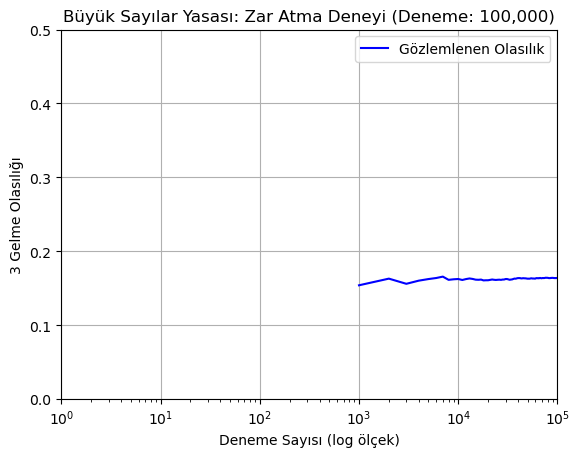

Son deneme: 100,000
Gözlemlenen 3 gelme olasılığı: 0.163900
Teorik olasılıktan fark: 0.002767
--------------------------------------------------


In [7]:
#ZAR ATMA SİMÜLASYONU - 6 yüzlü zar için özelleştirilmiş simülasyon

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Zar atma simülasyonu için özelleştirilmiş fonksiyon
def zar_atma_simulasyonu(max_deneme=10**6, guncelleme_araligi=1000):
    rng = np.random.RandomState(42)
    sonuclar = []
    ortalamalar = []
    deneme_sayilari = []
    
    # Teorik olasılıklar (6 yüzlü zar için)
    teorik_olasilik = 1/6
    
    plt.figure(figsize=(12, 6))
    plt.axhline(y=teorik_olasilik, color='r', linestyle='--', label='Teorik Olasılık (1/6)')
    
    for i in range(1, max_deneme + 1):
        # Zar at (1-6 arası rastgele sayı)
        zar = rng.randint(1, 7)
        sonuclar.append(zar)
        
        # Belirli aralıklarla güncelle
        if i % guncelleme_araligi == 0 or i == max_deneme:
            ortalama = (np.array(sonuclar) == 3).mean()  # 3 gelme olasılığı
            ortalamalar.append(ortalama)
            deneme_sayilari.append(i)
            
            # Canlı güncelleme
            clear_output(wait=True)
            plt.plot(deneme_sayilari, ortalamalar, 'b-', label='Gözlemlenen Olasılık')
            plt.title(f'Büyük Sayılar Yasası: Zar Atma Deneyi (Deneme: {i:,})')
            plt.xlabel('Deneme Sayısı (log ölçek)')
            plt.ylabel('3 Gelme Olasılığı')
            plt.xscale('log')
            plt.xlim(1, max_deneme)
            plt.ylim(0, 0.5)
            plt.legend()
            plt.grid(True)
            plt.show()
            
            print(f"Son deneme: {i:,}")
            print(f"Gözlemlenen 3 gelme olasılığı: {ortalama:.6f}")
            print(f"Teorik olasılıktan fark: {abs(ortalama - teorik_olasilik):.6f}")
            print("-"*50)
            
            # Küçük bir gecikme ekleyerek animasyon etkisi yarat
            time.sleep(0.1)
    
    return deneme_sayilari, ortalamalar

# Simülasyonu çalıştır
deneme_sayilari, ortalamalar = zar_atma_simulasyonu(max_deneme=10**5)

In [5]:
# Sonuç analizi
final_ortalama = ortalamalar[-1]
teorik_olasilik = 1/6
hata_payi = abs(final_ortalama - teorik_olasilik)

print("\n📊 Nihai Sonuçlar:")
print(f"Son deneme sayısı: {deneme_sayilari[-1]:,}")
print(f"Gözlemlenen ortalama: {final_ortalama:.6f}")
print(f"Teorik olasılık: {teorik_olasilik:.6f}")
print(f"Mutlak hata: {hata_payi:.6f}")
print(f"Bağıl hata: {(hata_payi/teorik_olasilik)*100:.2f}%")


📊 Nihai Sonuçlar:
Son deneme sayısı: 100,000
Gözlemlenen ortalama: 0.163900
Teorik olasılık: 0.166667
Mutlak hata: 0.002767
Bağıl hata: 1.66%


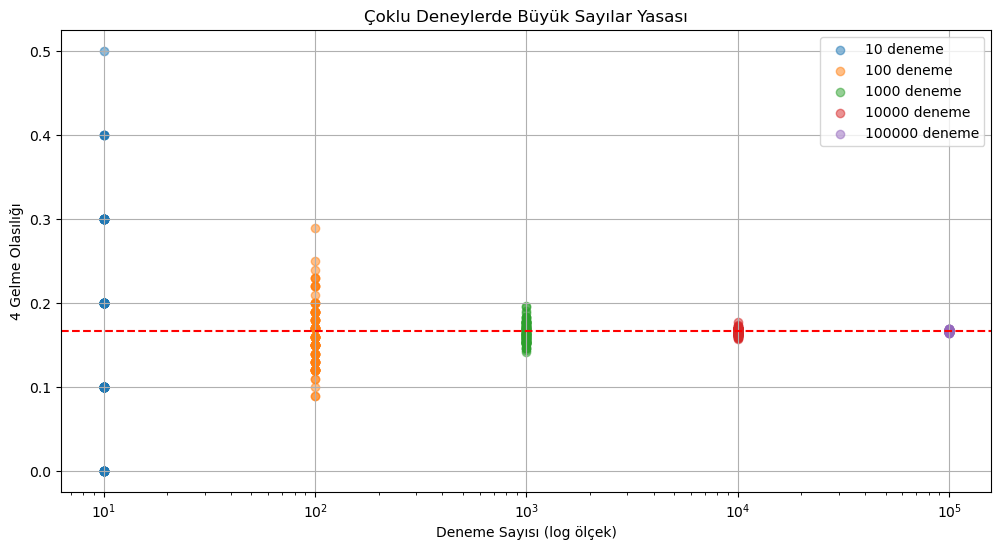

In [6]:
# Çoklu deneylerle yakınsama analizi
def coklu_deney_analizi(deneme_sayilari=[10, 100, 1000, 10000, 100000]):
    plt.figure(figsize=(12, 6))
    
    for deneme in deneme_sayilari:
        ortalamalar = []
        for _ in range(100):  # Her deneme sayısı için 100 tekrar
            zar = np.random.randint(1, 7, size=deneme)
            ortalamalar.append((zar == 4).mean())  # 4 gelme olasılığı
        
        plt.scatter([deneme]*100, ortalamalar, alpha=0.5, label=f'{deneme} deneme')
    
    plt.axhline(y=1/6, color='r', linestyle='--')
    plt.title('Çoklu Deneylerde Büyük Sayılar Yasası')
    plt.xlabel('Deneme Sayısı (log ölçek)')
    plt.ylabel('4 Gelme Olasılığı')
    plt.xscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

coklu_deney_analizi()

## 📐 Olasılık Dağılımı Nedir?

Olasılık dağılımı, rassal değişkenin alabileceği tüm değerlere karşılık gelen olasılıklardır.

| Tür | Kullanım |
|------|----------|
| **Kesikli** | Bernoulli, Binom, Poisson |
| **Sürekli** | Normal, Üstel, Uniform |

📌 Dağılım, her değerin ne kadar olası olduğunu gösterir.

## 🧠 Dağılım Neden Önemlidir?

| Sebep | Açıklama |
|--------|----------|
| ✅ **Modelleme** | Hangi dağılıma uygunsa model o şekilde kurulur |
| ✅ **Tahmin** | Gelecekteki olayları tahmin etmek için |
| ✅ **Anlamlılık Testi** | Hipotez testi için gerekli |
| ✅ **Risk Analizi** | Finans, üretim, sağlık gibi alanlarda risk hesaplamak için |


## 🛠️ Kesikli Dağılımlar

### 1. **Bernoulli Dağılımı**
Tek deneme → başarı ya da başarısızlık

In [8]:
from scipy.stats import bernoulli

# Başarı olasılığı %30
dist_bernoulli = bernoulli(p=0.3)

print("Başarı olasılığı (x=1):", dist_bernoulli.pmf(1))
print("Başarısızlık olasılığı (x=0):", dist_bernoulli.pmf(0))

Başarı olasılığı (x=1): 0.3
Başarısızlık olasılığı (x=0): 0.7000000000000002


- **Başarılı-Başarısız,Olumlu-Olumsuz sonucunda ikili sonuçlu olaylar ile ilgilenen kesikli olasılık dağılılımıdır.**

#### $X \sim \text{Bernoulli}(p)$, $P(X = k) = \begin{cases} p, & \text{if } k = 1 \\ (1-p), & \text{if } k = 0 \end{cases}$

Bu formülde:
- $ k $, rastgele değişkenin alabileceği değeri (1 veya 0),
- $ p $, başarı olasılığını temsil eder.

Bernoulli dağılımının varyansı ve standart sapması şu şekildedir:

$ \text{Varyans} (\sigma^2) = p(1-p) $

$ \text{Standart Sapma} (\sigma) = \sqrt{p(1-p)} $

In [9]:
from scipy.stats import bernoulli,binom

import numpy as np
import matplotlib.pyplot as plt
p=0.6
rv=bernoulli(p)
rv.pmf(k=0) # 0 olması durumu 

0.4000000000000001

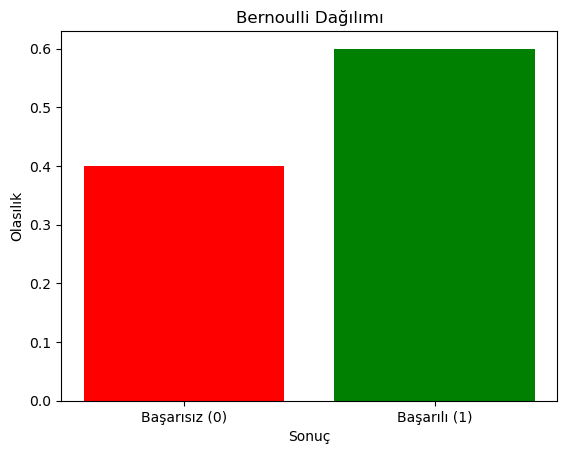

In [10]:
# Bernoulli dağılımı için parametre
p = 0.6  # Başarı olasılığı
# Olası sonuçlar (Başarı veya Başarısız)
outcomes = [0, 1]
# Olasılıklar
probabilities = [1 - p, p]
# Grafik çizimi
plt.bar(outcomes, probabilities, color=['red', 'green'])
plt.title('Bernoulli Dağılımı');
plt.xlabel('Sonuç');
plt.ylabel('Olasılık');
plt.xticks(outcomes, ['Başarısız (0)', 'Başarılı (1)']);
plt.show();

### 2. **Binom Dağılımı**
n bağımsız Bernoulli denemesinde k başarılı olma olasılığıdır.

In [11]:
from scipy.stats import binom

# 10 deneme, başarı oranı %30
dist_binom = binom(n=10, p=0.3)

print("Tam 3 başarı olasılığı:", dist_binom.pmf(3))
print("En fazla 3 başarı olasılığı:", dist_binom.cdf(3))

Tam 3 başarı olasılığı: 0.26682793199999977
En fazla 3 başarı olasılığı: 0.6496107184000002


📌 Yani 10 kez denediğinde tam 3 kez başarı elde etmenin şansı %26’dır.

İş Uygulaması: Reklam Harcaması Optimizasyonu

Çeşitli mecralara reklam veriliyor, reklamların tıklanma ve geri dönüşüm oranları optimize edilmeye çalışılıyor. Buna yönelik belirli bir mecrada çeşitli senaryolara göre reklama tıklama olasılıkları hesaplanmak isteniyor.


Detaylar:

Bir mecrada reklam verilecek

Dağılım ve reklama tıklama olasılığı biliniyor  (0.01)

Soru: Reklamı 100 kişi gördüğünde 1,5,10 tıklanması olasılığı nedir?

In [15]:
from scipy.stats import binom #binom dağılımı için scipy modülü kullanıldı

p = 0.01 #başarı olasılığı
n = 100 #deneme sayısı
rv = binom(n = n, p = p) #binom dağılımı oluşturuldu
print(rv.pmf(1)) #1 kişi görmesi başarı olasılığı
print(rv.pmf(5)) #5 kişi görmesi başarı olasılığı
print(rv.pmf(10)) #10 kişi görmesi başarı olasılığı


print(f'Reklamın  100 denemede ,1 kere tıklanma olasığı:{rv.pmf(1)}') 
print(f'Reklamın 100 denemede ,5 kere tıklanma olasığı:{rv.pmf(5)}')  
print(f'Reklamın 100 denemede ,10 kere tıklanma olasığı:{rv.pmf(10)}')  

0.36972963764972666
0.002897787123761478
7.006035693977194e-08
Reklamın  100 denemede ,1 kere tıklanma olasığı:0.36972963764972666
Reklamın 100 denemede ,5 kere tıklanma olasığı:0.002897787123761478
Reklamın 100 denemede ,10 kere tıklanma olasığı:7.006035693977194e-08


> ## **Binom dağılımı**</span>

- ##### <span style="color:green">**Binom :**</span> **Binom dağılım bernoullinin  n deneme sonucu k/x  başarılı olma olasılığı ile ilgilenildiğinde kullanılan dağılımdır. P başarı sayısı**


### $ P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$

Bu formülde:
- $n $, toplam deneme sayısını,
- $ k $, başarı sayısını,
- $ p $, her bir denemede başarı olasılığını temsil eder.
- $ \binom{n}{k}$ (n üzeri k) ise kombinasyonu temsil eder ve $ \binom{n}{k} = \frac{n!}{k!(n-k)!}$ olarak hesaplanır.

Binom dağılımının özellikleri şunlardır:

1. Her bir deneme iki olası sonuçla sonuçlanır (başarı veya başarısızlık).
2. Denemeler birbirinden bağımsızdır.
3. Her bir deneme için başarı olasılığı sabit bir değerdedir $ p $.
4. Toplam deneme sayısı $ n $ bellidir.

Binom dağılımının varyansı ve standart sapması şu şekildedir:

$ \text{Varyans} (\sigma^2) = np(1-p) $

$ \text{Standart Sapma} (\sigma) = \sqrt{np(1-p)}$

Burada:
- $n$, toplam deneme sayısını,
- $p$, her bir denemede başarı olasılığını temsil eder.


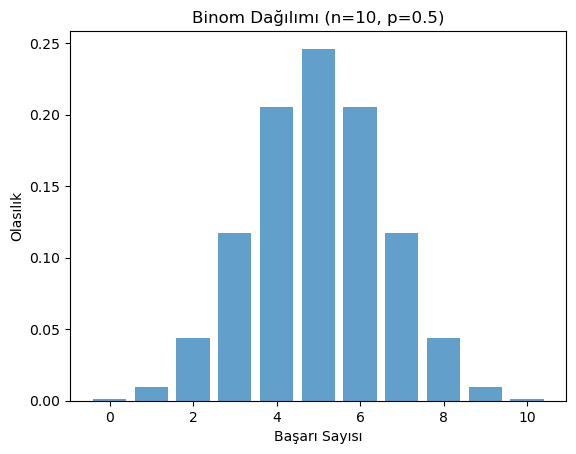

In [12]:
def plot_binomial_distribution(n, p):
    x = range(n + 1)
    y = [binom.pmf(i, n, p) for i in x]
    plt.bar(x, y, align='center', alpha=0.7)
    plt.title(f'Binom Dağılımı (n={n}, p={p})')
    plt.xlabel('Başarı Sayısı')
    plt.ylabel('Olasılık')
    plt.show()
# Örnek kullanım
plot_binomial_distribution(n=10, p=0.5)

*1. Grafik bize şunu söyler:**
   Eğer 2 sonuçlu bir deney \(n\) kez tekrarlanırsa, belirlenen gerçekleşme olasılığı günün sonunda normal dağılım olacaktır.

**2. Bu grafik, belirli bir binom dağılımını temsil eder ve belirli bir deneme sayısı (\(n\)) ile başarı olasılığı (\(p\)) kombinasyonu için başarı sayılarının olasılıklarını gösterir.**

**3. Grafikte:**
   - \(x\)-ekseni başarı sayılarını,
   - \(y\)-ekseni ise bu başarı sayılarının gerçekleşme olasılıklarını temsil eder.

**4. Her bir çubuk:**
   - Belirli bir başarı sayısının olasılığını gösterir.

**5. Örneğin:**
   Yukarıdaki örnekte \(n=10\) (toplam deneme sayısı) ve \(p=0.5\) (başarı olasılığı) olarak ayarlandı. Bu durumda grafik, 0'dan 10'a kadar olan başarı sayılarının olasılıklarını gösterir.

**6. Özel bir odaklanma:**
   - Eğer \(x=5\)'e odaklanırsak, bu, 10 denemede tam olarak 5 başarı elde etme olasılığını ifade eder.

**7. Kullanım Alanları:**
   - Bu tür bir grafik, belirli bir durumun olasılığını anlamak için kullanılır.
   - Örneğin, bir madeni paranın adil olup olmadığını kontrol etmek veya bir oyunda belirli bir başarı elde etme olasılığını değerlendirmek gibi durumlar için binom dağılımı kullanılabilir.

## Bernoulli ve Binom dağılımlarını birlikte gösteren, daha kapsamlı ve görsel açıdan zengin bir örnek kod:

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom
import seaborn as sns

# Stil ayarları
plt.style.use('seaborn-v0_8-whitegrid') # 'seaborn' is deprecated
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)

In [19]:
# Bernoulli Dağılımı Görselleştirme
def plot_bernoulli(p=0.6):
    # Bernoulli dağılımı oluşturma
    rv = bernoulli(p)

    # Olasılık kütle fonksiyonu
    outcomes = ['Başarısız (0)', 'Başarılı (1)']
    probs = [rv.pmf(0), rv.pmf(1)]

    # Grafik oluşturma
    plt.subplot(1, 2, 1)
    bars = plt.bar(outcomes, probs, width=0.5, alpha=0.7)

    # Çubuklara değer yazdırma
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}', ha='center', va='bottom')

    plt.title(f'Bernoulli Dağılımı (p={p})', fontsize=14)
    plt.xlabel('Sonuç', fontsize=12)
    plt.ylabel('Olasılık', fontsize=12)
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Binom Dağılımı Görselleştirme
def plot_binom(n=10, p=0.6):
    # Binom dağılımı oluşturma
    rv = binom(n, p)
    x = np.arange(0, n+1)
    pmf = rv.pmf(x)

    # Grafik oluşturma
    plt.subplot(1, 2, 2)
    bars = plt.bar(x, pmf, alpha=0.7, edgecolor='black')

    # Çubuklara değer yazdırma (sadece büyük olasılıklar için)
    for bar in bars:
        height = bar.get_height()
        if height > 0.01:
            plt.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.2f}', ha='center', va='bottom', fontsize=9)

    plt.title(f'Binom Dağılımı (n={n}, p={p})', fontsize=14)
    plt.xlabel('Başarı Sayısı', fontsize=12)
    plt.ylabel('Olasılık', fontsize=12)
    plt.xticks(x)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Parametreler
p = 0.6  # Başarı olasılığı
n = 10   # Deneme sayısı

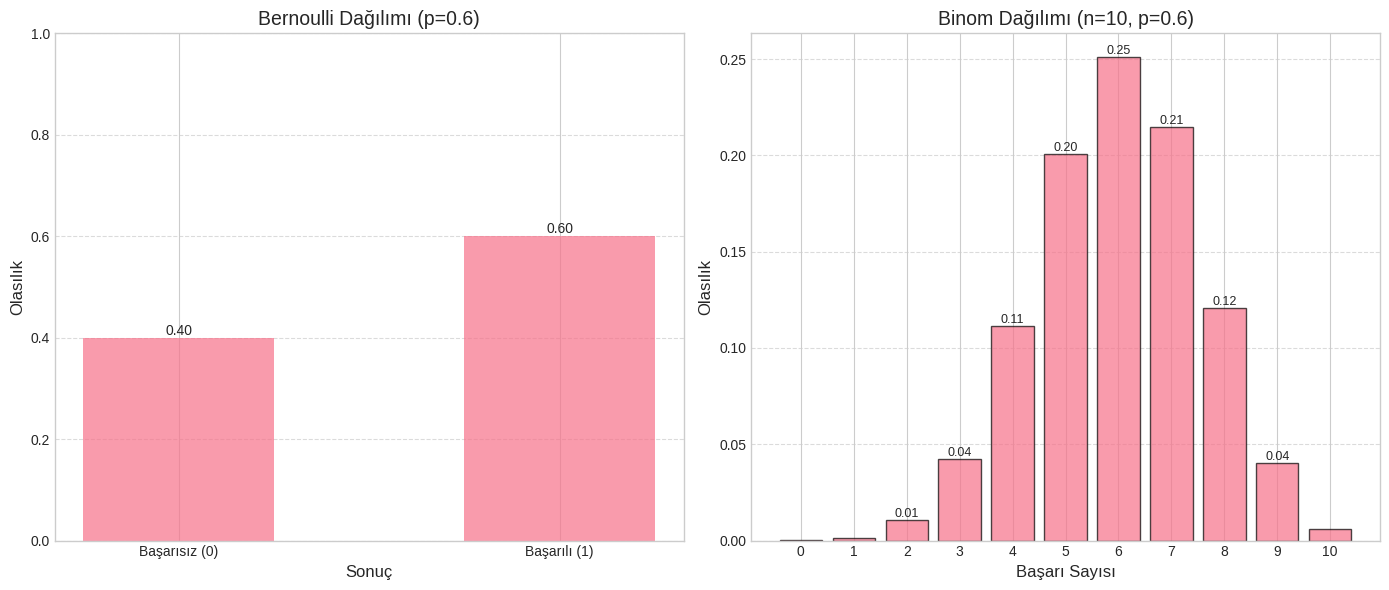

In [20]:
# Grafikleri çiz
plt.figure(figsize=(14, 6))
plot_bernoulli(p)
plot_binom(n, p)

plt.tight_layout()
plt.show()

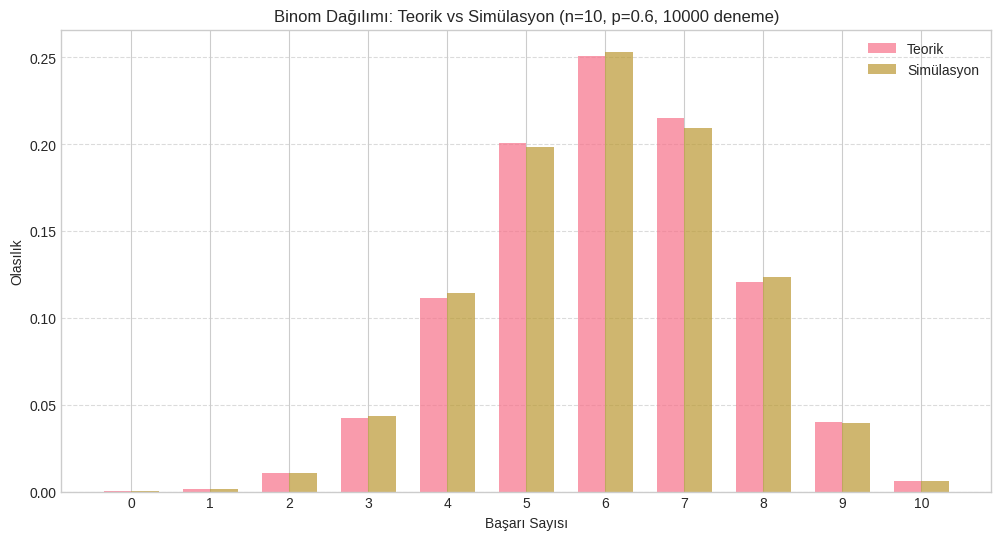

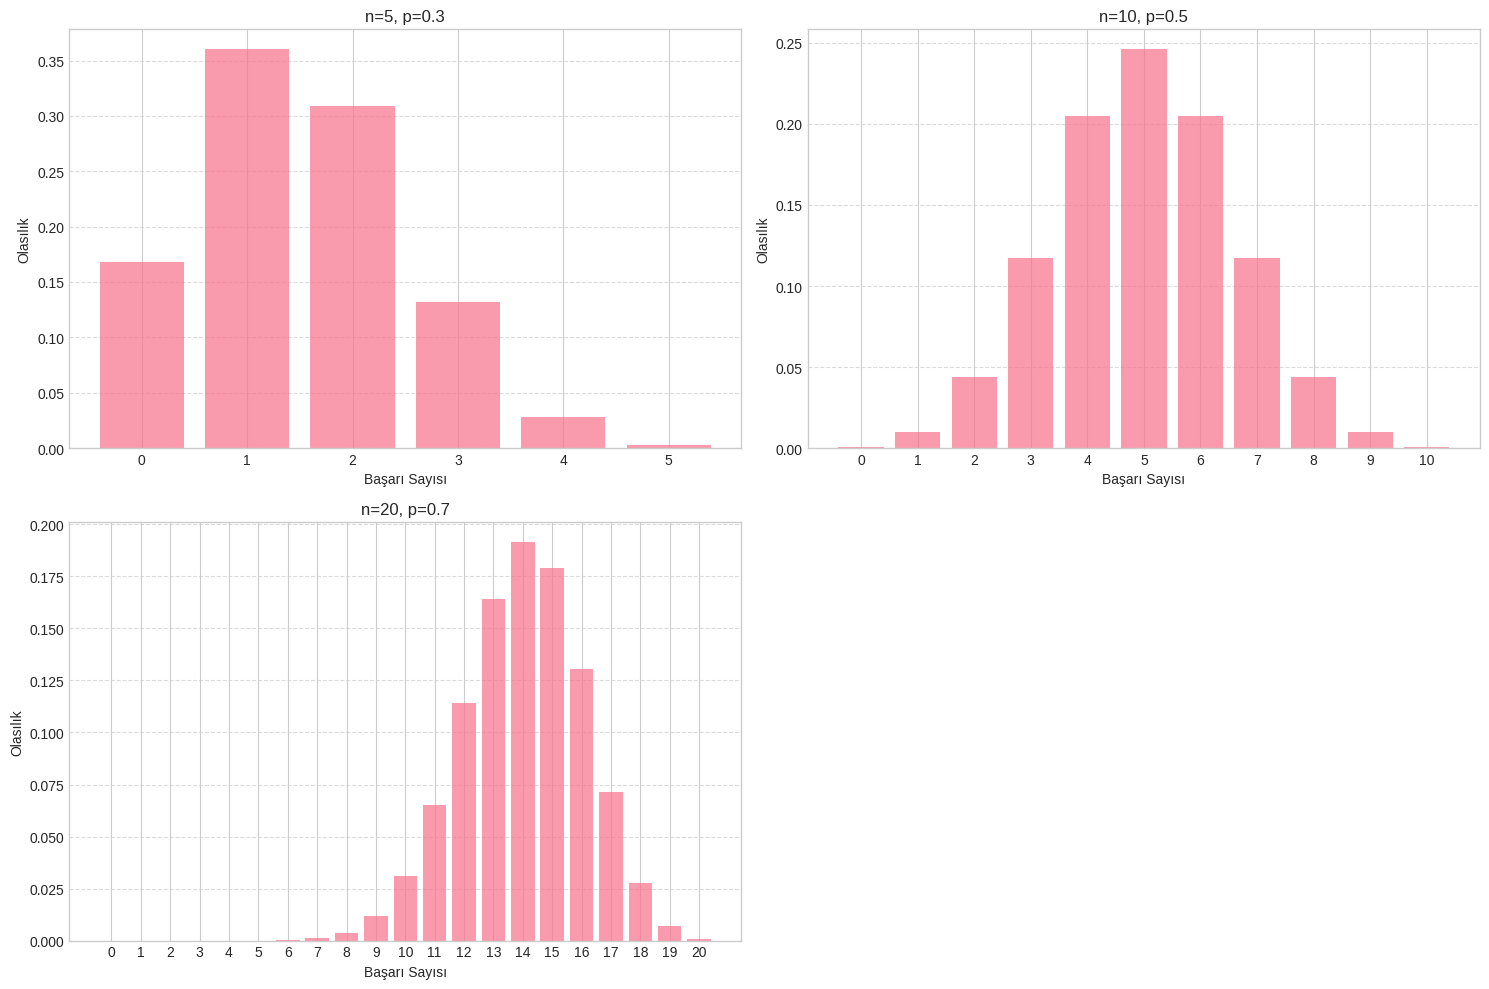

In [22]:
# Simülasyon ve Gerçek Dağılım Karşılaştırması
def simulate_binomial(n=10, p=0.6, trials=1000):
    # Teorik dağılım
    rv = binom(n, p)
    x = np.arange(0, n+1)
    theoretical = rv.pmf(x)

    # Simülasyon
    samples = binom.rvs(n, p, size=trials)
    simulated = np.bincount(samples, minlength=n+1) / trials

    # Grafik
    plt.figure(figsize=(12, 6))
    width = 0.35

    plt.bar(x - width/2, theoretical, width, label='Teorik', alpha=0.7)
    plt.bar(x + width/2, simulated, width, label='Simülasyon', alpha=0.7)

    plt.title(f'Binom Dağılımı: Teorik vs Simülasyon (n={n}, p={p}, {trials} deneme)')
    plt.xlabel('Başarı Sayısı')
    plt.ylabel('Olasılık')
    plt.xticks(x)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# Simülasyonu çalıştır
simulate_binomial(n, p, trials=10000)

# Farklı parametrelerle karşılaştırma
def compare_parameters():
    params = [(5, 0.3), (10, 0.5), (20, 0.7)]

    plt.figure(figsize=(15, 10))
    for i, (n_val, p_val) in enumerate(params, 1): # Changed variable names to avoid shadowing
        rv = binom(n_val, p_val)
        x = np.arange(0, n_val+1)
        pmf = rv.pmf(x)

        plt.subplot(2, 2, i)
        plt.bar(x, pmf, alpha=0.7)
        plt.title(f'n={n_val}, p={p_val}')
        plt.xlabel('Başarı Sayısı')
        plt.ylabel('Olasılık')
        plt.xticks(x)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

compare_parameters()

### 3. **Poisson Dağılımı**
Nadir olaylar için idealdir.

📌 Genellikle:
- Sahtekârlık tespiti
- Sistem hatası sayısı
- Günlük müşteri sayısı

#### Python Kodu:

In [23]:
from scipy.stats import poisson

# Ortalama 5 hata bekleniyor
dist_poisson = poisson(mu=5)

print("Tam 3 hata olasılığı:", dist_poisson.pmf(3))
print("En çok 3 hata olasılığı:", dist_poisson.cdf(3))

Tam 3 hata olasılığı: 0.1403738958142805
En çok 3 hata olasılığı: 0.2650259152973616


📌 Nadiren görülen olaylar için güçlü bir araçtır.


- **Belirli bir zaman aralığında belirli bir alanda nadiren rastlanan olayların olasılıklarını hesaplamak için kullanılır.Bu dağılım, özellikle düşük olasılıklı nadir olayların incelendiği durumlarda kullanışlıdır.**


#### $X \sim \text{Poisson}(\lambda)$, $P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}$

Burada:
- $\ P (X = k)\ $: k  olayın gerçekleşme olasılığı,
- $e$   : Euler sayısı (yaklaşık olarak 2.71828),
- $λ$: Beklenen olay sayısı belirli bir zaman aralığında,
- $k$: Gerçekleşen olay sayısı,
- $k!$: k faktöriyel (k faktöriyel, 1'den  k'ya kadar olan tüm pozitif tam sayıların çarpımıdır).

İşte Poisson dağılımı ile ilgili birkaç örnek:

### Örnek 1:

Bir kafede saat başına ortalama 3 müşteri gelmektedir. Bu kafede bir saat içinde 5 müşterinin gelme olasılığını bulun.

Çözüm:
### $ P(X = 5) = \frac{e^{-3} \cdot 3^5}{5!}$



### Örnek 2:

Bir trafik sinyali, saatte ortalama 2 kere arıza yapmaktadır. Bu trafik sinyali, bir saat içinde en fazla 1 kez arıza yapma olasılığını bulun.

Çözüm:
$ P(X \leq 1) = P(X = 0) + P(X = 1) $

Bu örnekler, Poisson dağılımının gerçek hayattaki çeşitli uygulama alanlarını temsil etmektedir. Bu tür problemlerde, beklenen olay sayısını temsil eden λ parametresi belirlenir ve ardından olayın belirli sayılarda gerçekleşme olasılıkları hesaplanır.

<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_743697/2508561578.py:9: SyntaxWarning: invalid escape sequence '\l'
  plt.title(f'Poisson Dağılımı ($\lambda$={lambda_param})')


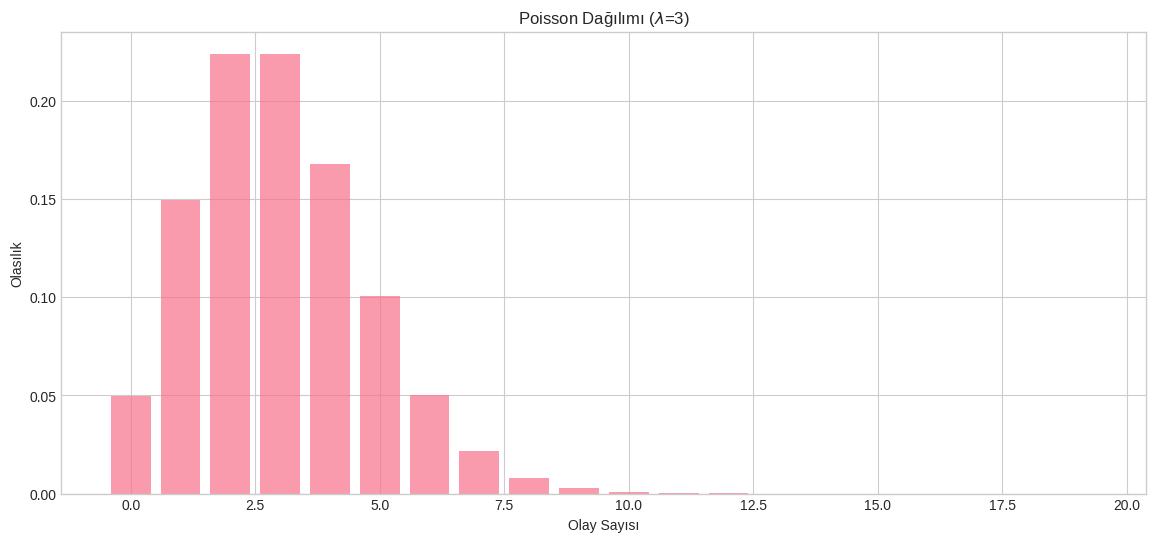

In [26]:
import matplotlib.pyplot as plt
from scipy.stats import poisson

def plot_poisson_distribution(lambda_param):
    x = range(0, 20)  # Olay sayıları 0'dan 19'a kadar
    y = [poisson.pmf(i, lambda_param) for i in x]

    plt.bar(x, y, align='center', alpha=0.7)
    plt.title(f'Poisson Dağılımı ($\lambda$={lambda_param})')
    plt.xlabel('Olay Sayısı')
    plt.ylabel('Olasılık')
    plt.show()

# Örnek kullanım
lambda_param = 3
plot_poisson_distribution(lambda_param)

Örnek 3: bir üniversitede 5000 not girişinde 5 tane notun yanlış girilmesi olasılığı nedir?  Lambda = 0.2


### $ P(X = 5 ; 0.2) = \frac{e^{-0.2} \cdot 0.2^5}{5!}$


= 0.00000218328201


Başka bir örnek verelim:  İş Uygulaması - İlan Girişi Hata Olasılıkları

Problem: Hatalı ilan girşi olasılıkları hesaplanmak isteniyor.

Detaylar:
Bir yıl süresince ölçümler yapılıyor.

Dağılım biliniyor, Possion ve Lambda 0.1 (Ortalama Hata Sayısı)

Hiç hata olmaması, 3 hata olması ve 5 hata olması olasılıkları nedir?

In [24]:
from scipy.stats import poisson
lambda_=0.1
rv=poisson(mu=lambda_)
print(rv.pmf(k=0)) #hiç hata olmaması olasılığı. NOT: Poisson bir veride hata olma olasılığının az olduğu bilindiğinde hatanın olma olasılığı nedir onu bulur 
print(rv.pmf(k=3)) #3 tane hata olma olasılığı
print(rv.pmf(k=5)) #5 tane hata olma olasılığı

0.9048374180359595
0.00015080623633932676
7.54031181696634e-08


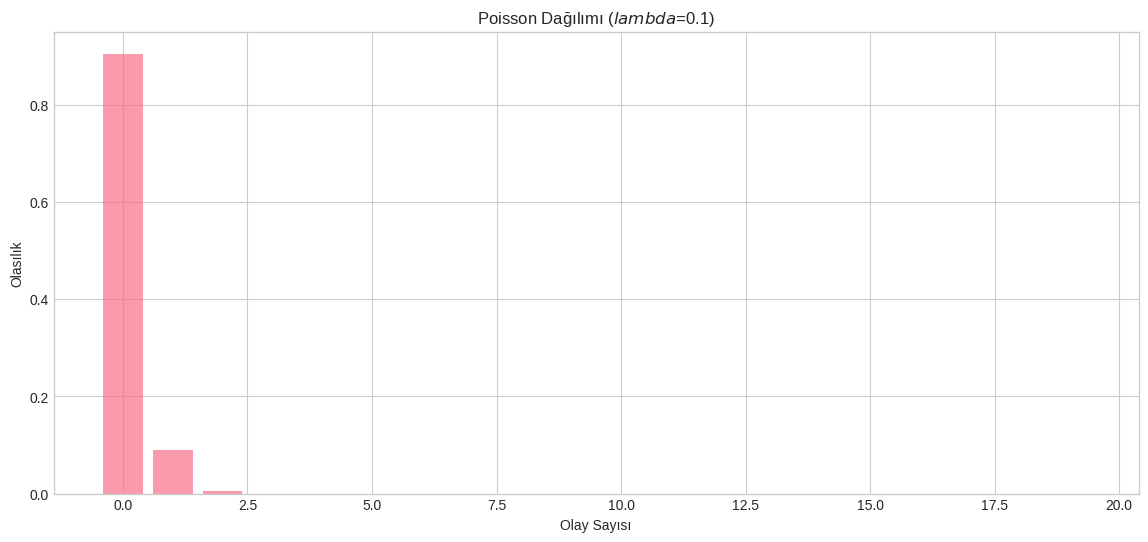

In [25]:
#Grafikte Gösterme

import matplotlib.pyplot as plt
from scipy.stats import poisson

def plot_poisson_distribution(lambda_param):
    x = range(0, 20)  # Olay sayıları 0'dan 19'a kadar
    y = [poisson.pmf(i, lambda_param) for i in x]  #probability mass function : olasılık kütle fonksiyonu : her bir olay sayısı için olasılık değerini hesaplar

    plt.bar(x, y, align='center', alpha=0.7)
    plt.title(f'Poisson Dağılımı ($lambda$={lambda_param})')
    plt.xlabel('Olay Sayısı')
    plt.ylabel('Olasılık')
    plt.show()

# Örnek kullanım
lambda_param = 0.1
plot_poisson_distribution(lambda_param)

##  Poisson dağılımını daha kapsamlı şekilde analiz eden ve görselleştiren gelişmiş bir örnek kod:

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Stil ayarları
# 'seaborn' stili artık önerilmiyor. Daha spesifik bir stil kullanın.
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 7)

def analyze_poisson(lambda_param=0.1, max_k=20):
    """
    Poisson dağılımını detaylı analiz eden ve görselleştiren fonksiyon

    Parametreler:
        lambda_param (float): Olayların ortalama görülme sıklığı
        max_k (int): Görselleştirmede gösterilecek maksimum olay sayısı
    """
    # Poisson dağılımı nesnesi
    rv = poisson(mu=lambda_param)

    # Temel olasılık hesaplamaları
    print(f"λ = {lambda_param} için Poisson Dağılımı Analizi")
    print("="*50)
    print(f"Hiç olay olmama olasılığı (k=0): {rv.pmf(0):.4f}")
    print(f"En az bir olay olma olasılığı: {1 - rv.pmf(0):.4f}")
    print(f"Ortalama (λ): {rv.mean():.2f}")
    print(f"Varyans: {rv.var():.2f}")
    print(f"Standart Sapma: {rv.std():.2f}\n")

    # Önemli k değerleri için olasılıklar
    k_values_to_print = [0, 1, 2, 3, 5, 10]
    # Sadece max_k'den küçük veya eşit olanları listeye dahil et
    k_values_to_print = [k for k in k_values_to_print if k <= max_k]

    print("Önemli k değerleri için olasılıklar:")
    for k in k_values_to_print:
        print(f"k={k} olma olasılığı: {rv.pmf(k):.6f}")

    # Kümülatif olasılık analizi
    print("\nKümülatif olasılıklar:")
    # Sadece max_k'den küçük veya eşit olan eşikleri kullan
    thresholds_to_print = [1, 2, 3]
    thresholds_to_print = [t for t in thresholds_to_print if t <= max_k]

    for threshold in thresholds_to_print:
        # Kümülatif olasılığı hesaplamak için cdf() metodunu kullanmak daha doğrudur
        prob = rv.cdf(threshold)
        print(f"En fazla {threshold} olay olma olasılığı: {prob:.4f}")


    # Görselleştirme
    # Gösterilecek k değerleri aralığını lambda'ya göre dinamik olarak ayarlamak daha iyi olabilir,
    # ancak şimdilik max_k'yi kullanıyoruz.
    x = np.arange(0, max_k + 1)
    pmf = rv.pmf(x)
    cdf = rv.cdf(x)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # PMF Grafiği
    bars = ax1.bar(x, pmf, alpha=0.7, edgecolor='black')
    ax1.set_title(f'Poisson Olasılık Kütle Fonksiyonu (λ={lambda_param})')
    ax1.set_xlabel('Olay Sayısı (k)')
    ax1.set_ylabel('Olasılık')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

    # Çubuklara değer yazdırma (sadece önemli olasılıklar için)
    for bar in bars:
        height = bar.get_height()
        if height > 0.001: # Eşik değeri ayarlanabilir
             ax1.text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.3f}', ha='center', va='bottom', fontsize=9)


    # CDF Grafiği
    ax2.step(x, cdf, where='post', color='orange', linewidth=3) # 'post' step tipi daha uygundur
    ax2.set_title(f'Kümülatif Dağılım Fonksiyonu (λ={lambda_param})')
    ax2.set_xlabel('Olay Sayısı (k)')
    ax2.set_ylabel('Kümülatif Olasılık')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


In [28]:
# Farklı lambda değerleri için karşılaştırma
def compare_lambdas(lambdas=[0.1, 1, 3, 5]):
    plt.figure(figsize=(12, 6))
    # Görselleştirme aralığını en büyük lambda'ya göre ayarlamak daha iyi olabilir
    max_k_compare = max(lambdas) + 5 # En büyük lambda'dan biraz daha fazlasını göster
    if max_k_compare < 15: # Çok küçük lambdalar için minimum bir aralık belirle
        max_k_compare = 15
    x = np.arange(0, int(max_k_compare) + 1)

    for lam in lambdas:
        pmf = poisson.pmf(x, lam)
        plt.plot(x, pmf, 'o-', label=f'λ={lam}', markersize=6)

    plt.title('Farklı λ Değerleri için Poisson Dağılımları')
    plt.xlabel('Olay Sayısı (k)')
    plt.ylabel('Olasılık')
    plt.legend()
    plt.grid(True)
    plt.xticks(np.arange(0, int(max_k_compare) + 1, max(1, int(max_k_compare/10)))) # Otomatik adım belirleme
    plt.show()

In [29]:
# Gerçek hayat senaryosu simülasyonu
def defect_simulation(lambda_param=0.1, days=365):
    print(f"\nÜretim Hata Simülasyonu (Günlük ortalama hata: {lambda_param}, {days} gün)")

    # Poisson dağılımından örneklem çekme
    daily_defects = poisson.rvs(mu=lambda_param, size=days)

    # İstatistikler
    # np.bincount, 0'dan başlayarak tüm tam sayı değerlerinin sayısını verir
    # minlength, 0 hatalı günlerin de sayılmasını sağlar.
    max_defects = np.max(daily_defects) if len(daily_defects) > 0 else 0
    counts = np.bincount(daily_defects, minlength=max_defects + 1)
    unique_defects = np.arange(len(counts))

    defect_dist = dict(zip(unique_defects, counts))

    print("\nHata dağılımı:")
    # Sözlüğü sıralamaya gerek yok, unique_defects zaten sıralı
    for k in unique_defects:
         # Yüzdeyi sadece sayım 0'dan büyükse yazdır
        if defect_dist[k] > 0:
             print(f"{k} hata: {defect_dist[k]} gün ({defect_dist[k]/days*100:.1f}%)")
        else:
             # Sıfır gün sayısını da yazdırmak isteyebiliriz
             print(f"{k} hata: {defect_dist[k]} gün ({defect_dist[k]/days*100:.1f}%)")


    # Uzun vadeli analiz
    # get(0, 0) metodu, eğer 0 anahtarı yoksa 0 döner, bu da hatasız günlerin doğru sayılmasını sağlar.
    print(f"\nHatasız gün yüzdesi: {defect_dist.get(0, 0)/days*100:.1f}%")
    print(f"En az bir hata olan gün yüzdesi: {(days - defect_dist.get(0, 0))/days*100:.1f}%")

    # Görselleştirme
    plt.figure(figsize=(12, 6))
    # Bar grafiği için x eksenindeki değerler ve yükseklikler
    plt.bar(unique_defects, counts/days, alpha=0.7, edgecolor='black')
    plt.title(f'Günlük Hata Dağılımı (λ={lambda_param}, {days} gün)')
    plt.xlabel('Günlük Hata Sayısı')
    plt.ylabel('Göreli Sıklık')
    # X eksenindeki etiketleri sadece gözlemlenen hatalara göre ayarlama
    plt.xticks(unique_defects)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

1. TEMEL POISSON ANALİZİ
λ = 2.5 için Poisson Dağılımı Analizi
Hiç olay olmama olasılığı (k=0): 0.0821
En az bir olay olma olasılığı: 0.9179
Ortalama (λ): 2.50
Varyans: 2.50
Standart Sapma: 1.58

Önemli k değerleri için olasılıklar:
k=0 olma olasılığı: 0.082085
k=1 olma olasılığı: 0.205212
k=2 olma olasılığı: 0.256516
k=3 olma olasılığı: 0.213763
k=5 olma olasılığı: 0.066801
k=10 olma olasılığı: 0.000216

Kümülatif olasılıklar:
En fazla 1 olay olma olasılığı: 0.2873
En fazla 2 olay olma olasılığı: 0.5438
En fazla 3 olay olma olasılığı: 0.7576


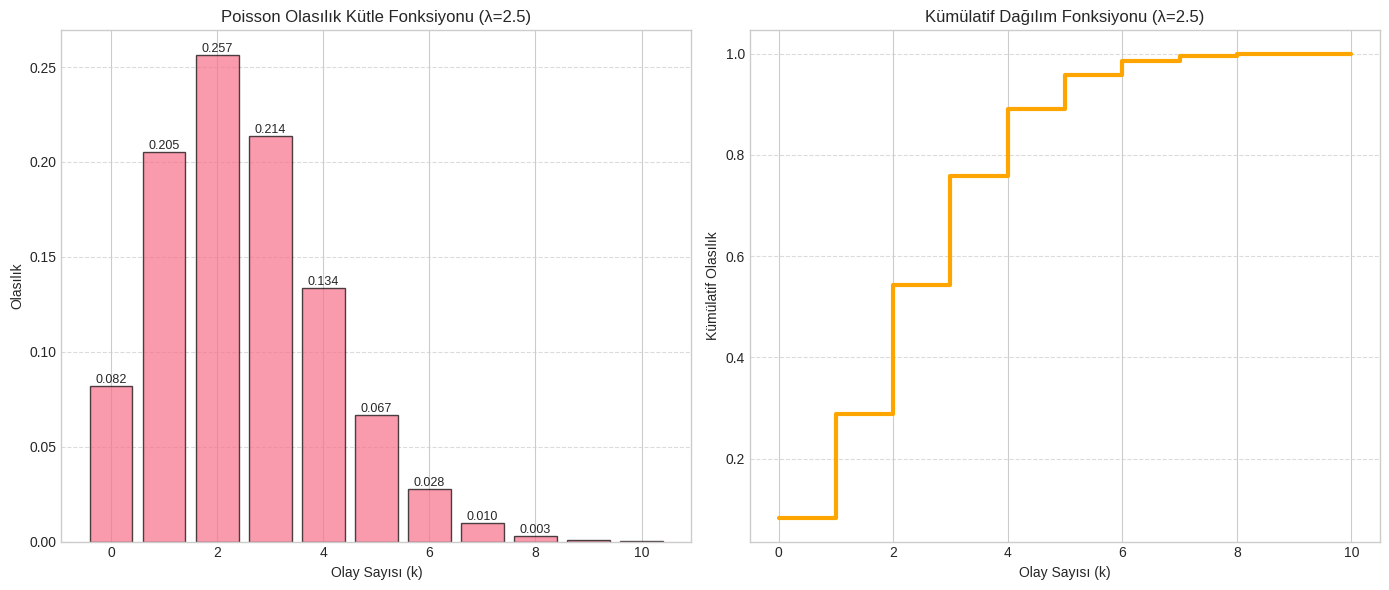

λ = 0.8 için Poisson Dağılımı Analizi
Hiç olay olmama olasılığı (k=0): 0.4493
En az bir olay olma olasılığı: 0.5507
Ortalama (λ): 0.80
Varyans: 0.80
Standart Sapma: 0.89

Önemli k değerleri için olasılıklar:
k=0 olma olasılığı: 0.449329
k=1 olma olasılığı: 0.359463
k=2 olma olasılığı: 0.143785
k=3 olma olasılığı: 0.038343
k=5 olma olasılığı: 0.001227

Kümülatif olasılıklar:
En fazla 1 olay olma olasılığı: 0.8088
En fazla 2 olay olma olasılığı: 0.9526
En fazla 3 olay olma olasılığı: 0.9909


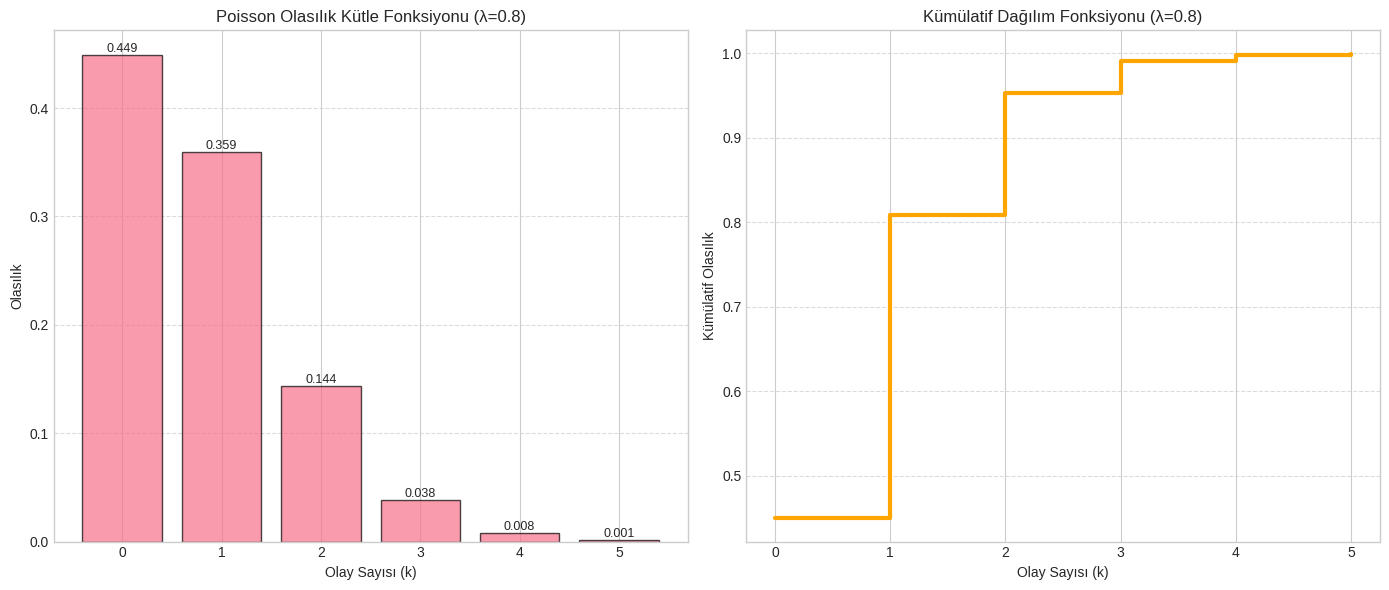


2. FARKLI λ DEĞERLERİ KARŞILAŞTIRMASI


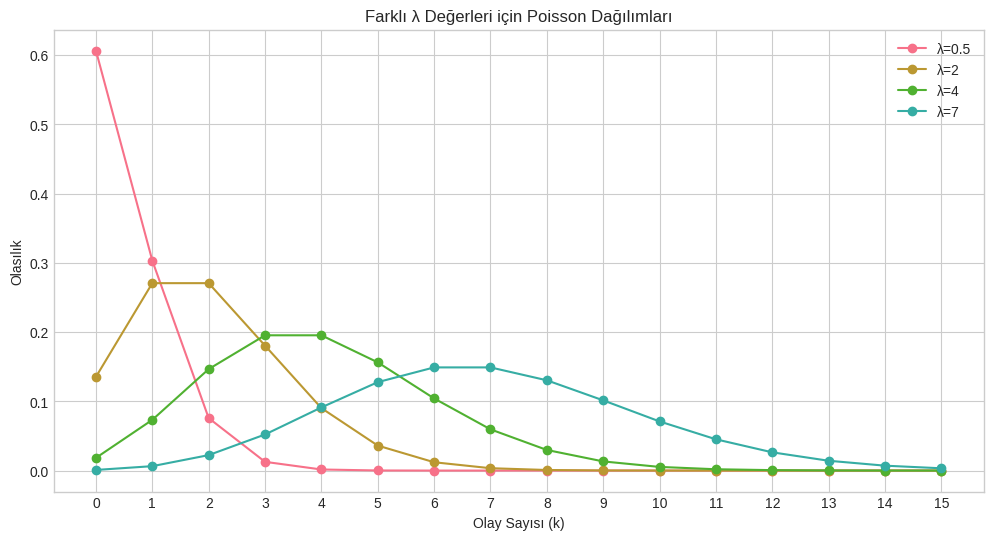


3. GERÇEK HAYAT SİMÜLASYONU

Üretim Hata Simülasyonu (Günlük ortalama hata: 1.2, 5000 gün)

Hata dağılımı:
0 hata: 1539 gün (30.8%)
1 hata: 1791 gün (35.8%)
2 hata: 1048 gün (21.0%)
3 hata: 462 gün (9.2%)
4 hata: 121 gün (2.4%)
5 hata: 35 gün (0.7%)
6 hata: 4 gün (0.1%)

Hatasız gün yüzdesi: 30.8%
En az bir hata olan gün yüzdesi: 69.2%


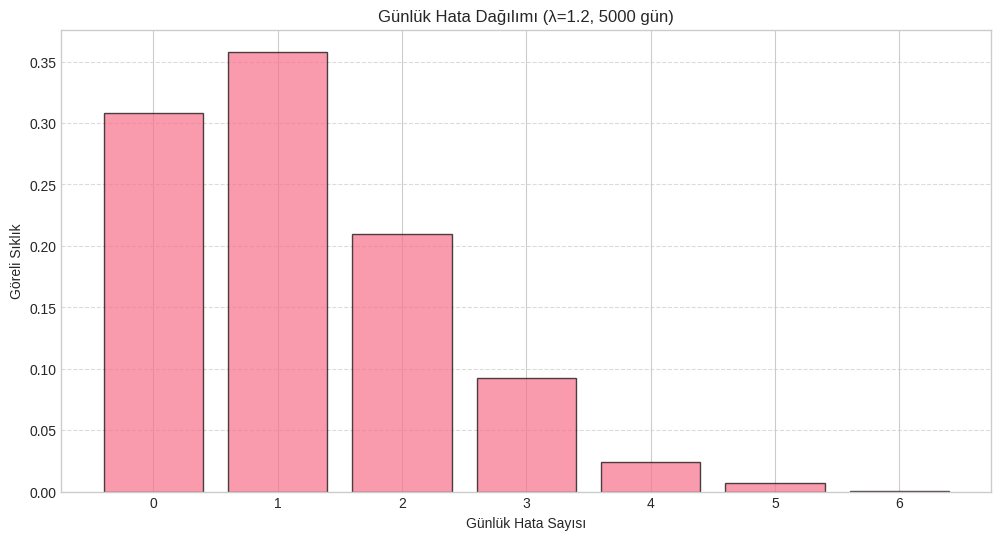

In [30]:
# Analizleri çalıştır
print("1. TEMEL POISSON ANALİZİ")
analyze_poisson(lambda_param=2.5, max_k=10) # Lambda değerini daha belirgin bir dağılım için değiştirdim
analyze_poisson(lambda_param=0.8, max_k=5) # Başka bir örnek

print("\n2. FARKLI λ DEĞERLERİ KARŞILAŞTIRMASI")
compare_lambdas(lambdas=[0.5, 2, 4, 7]) # Karşılaştırma lambdalarını değiştirdim

print("\n3. GERÇEK HAYAT SİMÜLASYONU")
defect_simulation(lambda_param=1.2, days=5000) # Lambda ve gün sayısını değiştirdim

## 📈 Sürekli Dağılımlar

### 1. **Normal Dağılım (Gauss Dağılımı)**

Ortalama etrafında simetrik dağılan veriler için kullanılır.




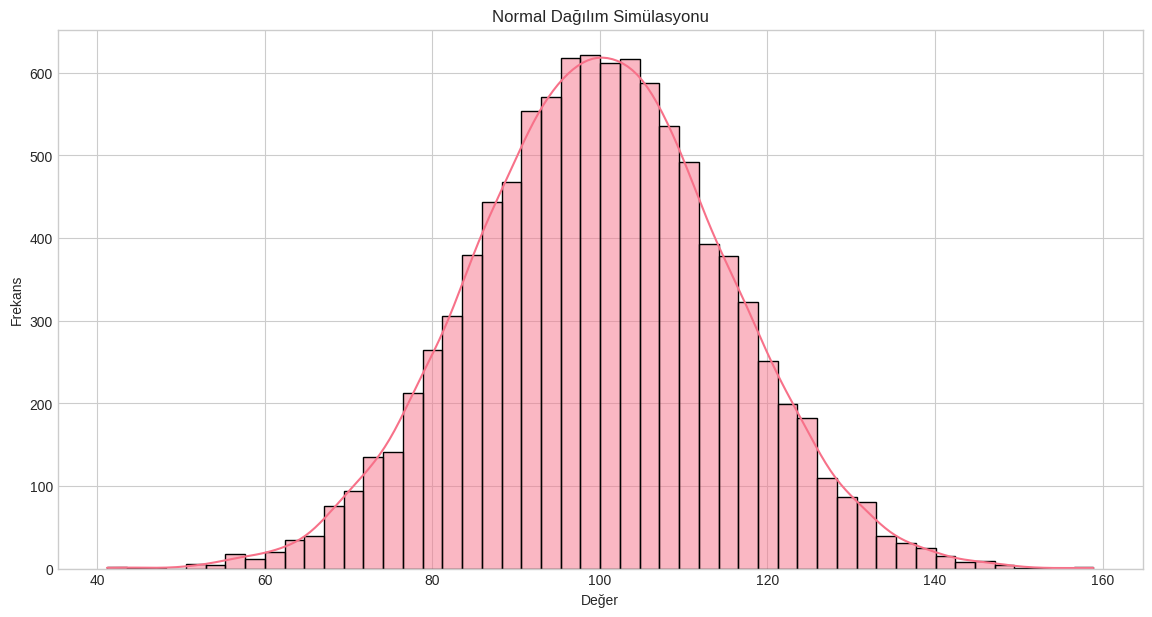

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

np.random.seed(42)
veri = np.random.normal(loc=100, scale=15, size=10000)

sns.histplot(veri, bins=50, kde=True)
plt.title("Normal Dağılım Simülasyonu")
plt.xlabel("Değer")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()

📌 Bu grafikte:
- Merkeze yakın değerler daha yüksek frekanslı
- Belli bir aralıkta yoğunlaşma var

## 📉 Normal Dağılım Özellikleri

### Formülü:
$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

📌 Ama biz formülleri değil, uygulamayı öğreneceğiz.

In [47]:
# Ortalama, Medyan, Mod:

print("Ortalama:", np.mean(veri).round(2))
print("Medyan:", np.median(veri).round(2))
print("Mod:", pd.Series(veri).mode()[0].round(2))


Ortalama: 99.97
Medyan: 99.96
Mod: 41.16


In [48]:
# Standart Sapma ve Ranj:

std_dev = np.std(veri)
print(f"Standart Sapma: {std_dev:.2f}")
print(f"Değişim Aralığı: {np.max(veri) - np.min(veri):.2f}")

Standart Sapma: 15.05
Değişim Aralığı: 117.73


- ##### <span style="color:green">**Normal Dağılım  :**</span> **Normal dağılımın Ortalama ve medyan ve mod u eşittir; her ikisi de dağılım merkezindedir Verinin yaklaşık 68'i ortalamanın 1 standart sapma içine düşer,Verinin yaklaşık 95'i ortalamanın 2 standart sapma içine düşer,Verinin yaklaşık 99,7'si ortalamanın 3 standart sapma içine düşer**


### $X \sim \mathcal{N}(\mu, \sigma^2)$, $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$



Bu formülde:
-  $f(x)$ : Belirli bir $x$ değeri için olasılık yoğunluğu,
-  $μ$: Ortalama (mean) değer,
-  $σ$: Standart sapma,
-  $π$: π sayısı (yaklaşık olarak 3.14159),
-  $e$: Euler sayısı (yaklaşık olarak 2.71828).

Bu formül, bir normal dağılımın belirli bir değeri $f(x)$ için olasılığını ifade eder. Ancak, genellikle belirli bir aralıktaki olasılığı hesaplamak için integral kullanılır. Eğer belirli bir aralıktaki olasılığı hesaplamak istiyorsanız, bu formülü integralle kullanmanız gerekecektir.

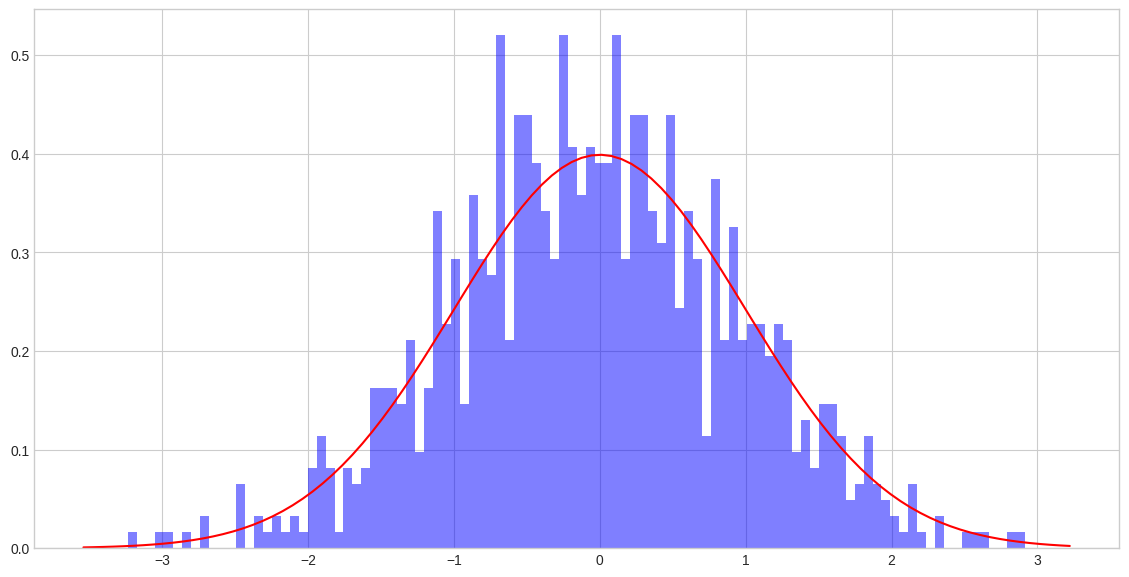

In [32]:
ortalama = 0
standart_sapma = 1
# Normal dağılımı oluştur
veri = np.random.normal(ortalama, standart_sapma, 1000)

# Histogramı çiz
plt.hist(veri, bins=100, density=True, alpha=0.5, color='b')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
teorik_dagilim = (1/(standart_sapma * np.sqrt(2 * np.pi))) * np.exp(-(x - ortalama)**2 / (2 * standart_sapma**2))
plt.plot(x, teorik_dagilim, color='r');

# Grafiği göster
plt.show();

## İş uygulaması:  Satış Olasılıklarının Hesaplanması

Problem : Bir yatırım/toplantı öncesinde gelecek ay ile ilgili satışların belirli değerlerde gerçekleşmesi olasılıkları belirlenmek isteniyor.

Detaylar:
Dağılımın normal olduğunu biliniyor.

Aylık ortalama satış sayısı 80K, standart sapması std 5K

90K'dan fazla satış yapma olasılığı nedir?

P(X>90) = 0.0228  - 90'dan fazla olma olasılığı

P(X>70) = 0.9772

P(X<73) = 0.0808

P(85<X<90) = 0.1359


Belirsizlik altında karar vermeye çalışmak

Uygun olasılık fonksiyonları ile olasılık hesapları yapmak

In [33]:
from scipy.stats import norm 

In [34]:
#90'dan fazla olma olasılığı

1-norm.cdf(90, 80, 5) #90'dan fazla olma olasılığı, cdf : cumulative density function, birinci değer hesaplamak istediğimiz değer, ikinci değer ortalama, üçüncü değer standart sapma

#neden 1'den çıkarma işlemi gerçekleştirdik? normal eğri yapısı altında kalan alan 1'e eşit. bize ise belirli bir integral kısmı lazımdı, bu yüzden cdf fonksiyonunu kullanarak 90'dan fazla olma olasılığını hesaplayabilmek için 1'den çıkardık

0.02275013194817921

In [35]:
#70'den fazla olma olasılığı

1-norm.cdf(70, 80, 5) #70'den fazla olma olasılığı

0.9772498680518208

In [36]:
mean = 80
std = 5
x = 70
probability = norm.cdf(x, mean, std)
print(f'70 dan büyük olma olasılığı 80 ortalama 5 standart sampma: {1 - probability}')     

70 dan büyük olma olasılığı 80 ortalama 5 standart sampma: 0.9772498680518208


In [37]:
#73'den az olma olasılığı

1 - (1-norm.cdf(73, 80, 5))#73'den az olma olasılığı,  aslında burada 1'den çıkarma işlemi yapmamıza gerek yok, çünkü 73'den az olma olasılığı zaten cdf fonksiyonu ile hesaplanmış oluyor

0.08075665923377107

In [38]:
#85 ile 90 arasında olma olasılığı

norm.cdf(90, 80, 5) - norm.cdf(85, 80, 5) #85 ile 90 arasında olma olasılığı

0.13590512198327787

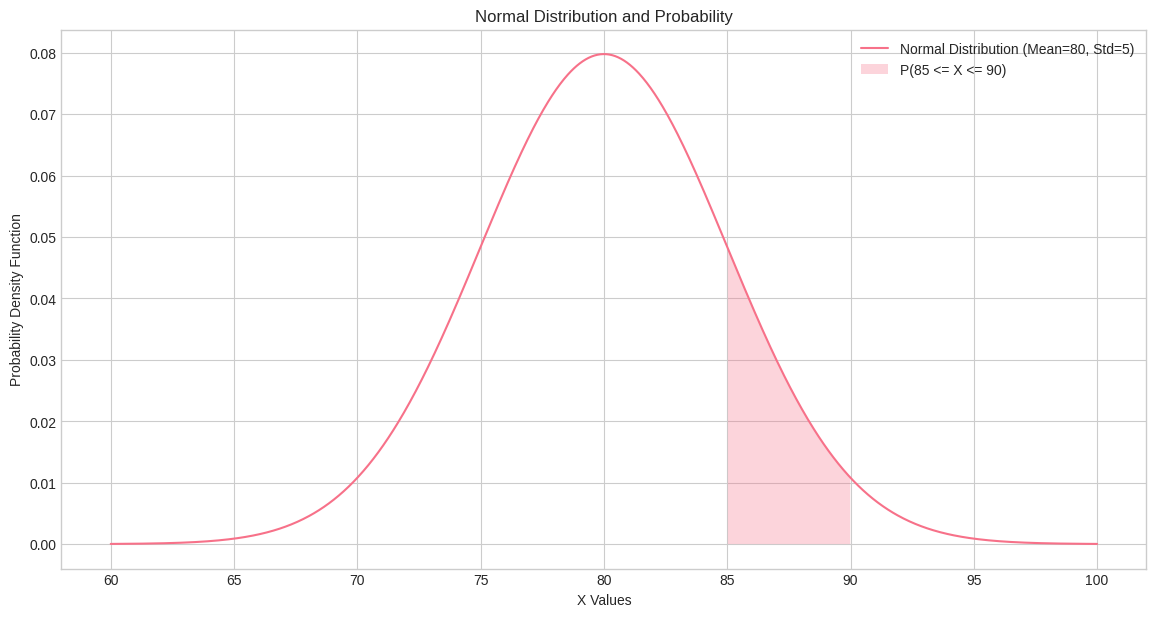

In [39]:
#85 ile 95 arasında olma olasılığı grafikte gösterme

# Normal dağılım parametreleri
mean = 80
std = 5

# X değerlerini oluştur
x_values = np.linspace(60, 100, 1000)

# Normal dağılımın olasılık yoğunluk fonksiyonunu hesapla
pdf_values = norm.pdf(x_values, mean, std)

# X değerlerini ve olasılıkları içeren bir grafik oluştur
plt.plot(x_values, pdf_values, label='Normal Distribution (Mean=80, Std=5)');
plt.fill_between(x_values, pdf_values, where=[(x >= 85 and x <= 90) for x in x_values], alpha=0.3, label='P(85 <= X <= 90)');
plt.title('Normal Distribution and Probability');
plt.xlabel('X Values');
plt.ylabel('Probability Density Function');
plt.legend();
plt.show();

# X değerleri arasında kalan olasılığı gösteren bir grafik oluşturur. 
# Dolaylı olarak, norm.cdf(90, 80, 5) - norm.cdf(85, 80, 5) ifadesindeki değeri de gösterir. 

### 2. **Uniform Dağılım**

Tüm değerler eşit olasılığa sahipse kullanılır.

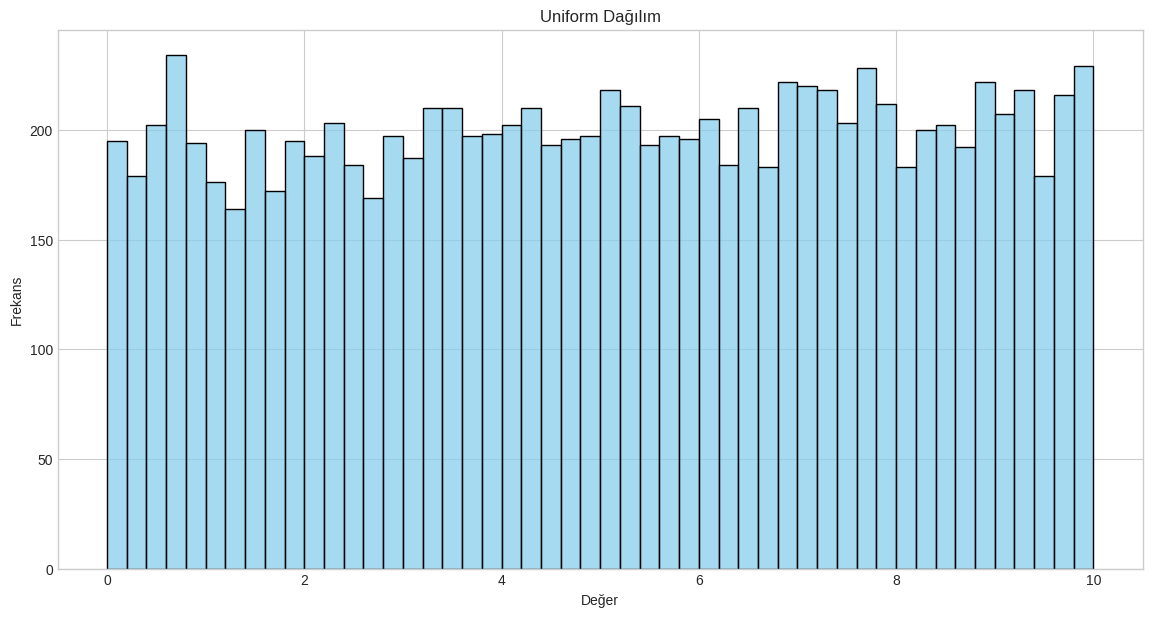

In [41]:

# 0–10 arasında uniform dağılım
uniform_veri = np.random.uniform(low=0, high=10, size=10000)

sns.histplot(uniform_veri, bins=50, color='skyblue', edgecolor='black')
plt.title("Uniform Dağılım")
plt.xlabel("Değer")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()

📌 Tüm değerler neredeyse aynı oranda tekrar eder.

### 3. **Üstel Dağılım**

Zaman serisi analizlerinde, olaylar arası zaman için kullanılır.

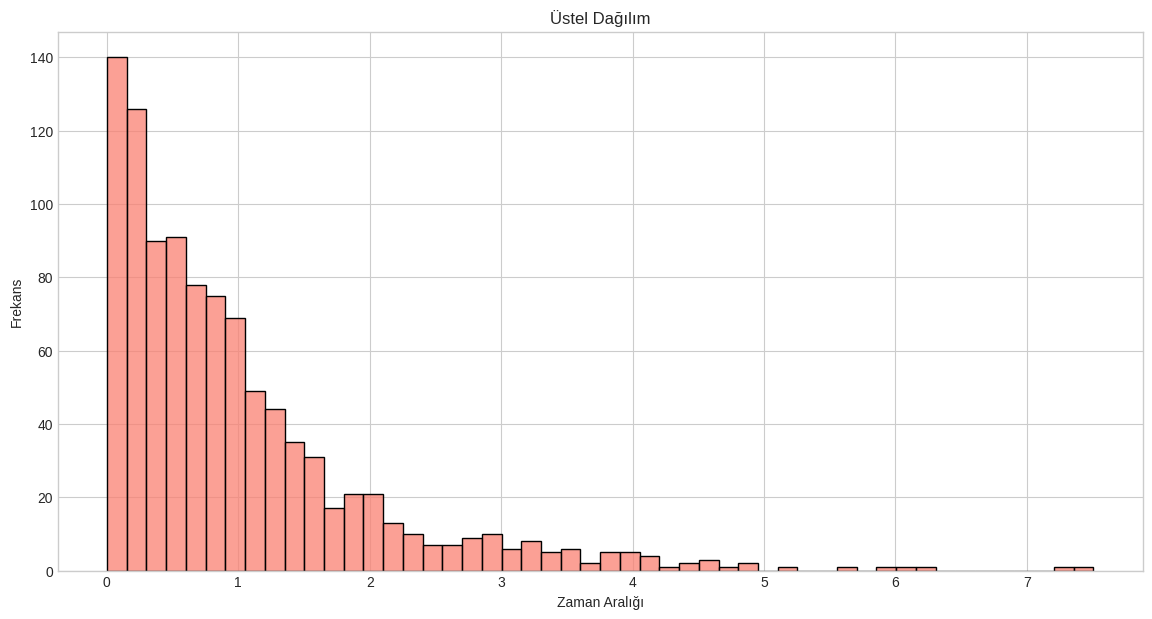

In [42]:
from scipy.stats import expon

# Günlük çağrı merkezi gelen çağrı sayısı
exp_data = expon.rvs(scale=1.0, size=1000)

sns.histplot(exp_data, bins=50, color='salmon', edgecolor='black')
plt.title("Üstel Dağılım")
plt.xlabel("Zaman Aralığı")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()

📌 Zaman arttıkça olasılık azalır.

## 📌 Bayes Teoremi ile Bağlantı

Bir önceki olasılık → önceki bilgi  
Yeni veri geldiğinde → yeni olasılık

📌 Bayes teoremi, bu güncellemeyi yapar.

## 🧪 Gerçek Hayatta Nerelerde Görülür?

| Dağılım | Uygulama Alanı |
|---------|----------------|
| **Bernoulli** | Etkileşim oranları, dönüşüm oranları |
| **Binom** | Birden fazla deneme sonucunda başarı sayısı |
| **Poisson** | Nadir olaylar: hata sayısı, sahtekârlık sayısı |
| **Normal** | Gelir dağılımı, kalite kontrolü |
| **Üstel** | Olaylar arası süre: çağrı süresi, hata süresi |
| **Uniform** | Rastgelelik gerektiren modeller |
